# 441B HW2
# Yusong Chen 306315484

In [63]:
import pandas as pd

# 1.) Clean the Apple Data to get a quarterly series of EPS.

In [64]:
y = pd.read_csv("AAPL_quarterly_financials.csv")

In [65]:
y.index = y.name

In [66]:
y = pd.DataFrame(y.loc["BasicEPS", :]).iloc[2:,:]

In [67]:
y.index = pd.to_datetime(y.index)

In [68]:
# CHECK IF NAS ARE NO DIVIDEND PERIOD
y = y.sort_index().fillna(0.)
y = y.loc["2004-03-31":]


# 2.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data

In [69]:
from pytrends.request import TrendReq

In [70]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["Phone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price",
            "Recession","Chip Costs","Taylor Swift Tickets","Is the Earth Flat","Hospital"]  
            # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [71]:
df = df.resample("Q").mean()

In [72]:
# ALIGN DATA
temp = pd.concat([y, df],axis = 1).dropna()
y = temp[["BasicEPS"]].copy()
X = temp.iloc[:,1:].copy()

# 3.) Normalize all the X data

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [74]:
X_scaled = scaler.fit_transform(X)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [75]:
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import numpy as np

In [76]:
lasso = Lasso(alpha = .5)

In [77]:
lasso.fit(X_scaled, y)

Lasso(alpha=0.5)

In [78]:
coefficients = lasso.coef_
intercept = lasso.intercept_

print(coefficients)

[ 0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]


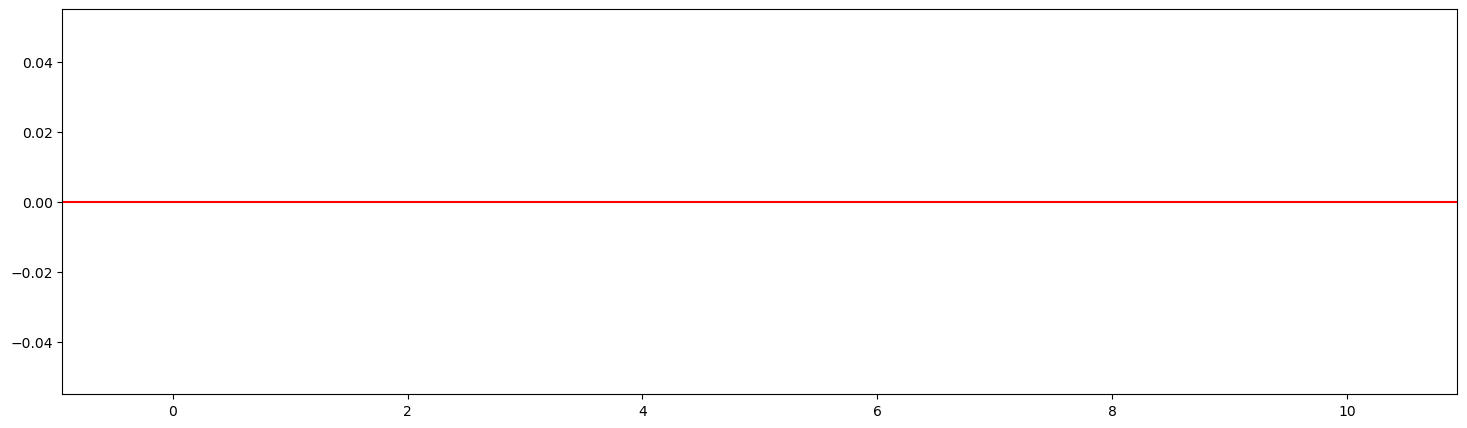

In [79]:
plt.figure(figsize = (18,5))
categories = ["Phone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price",
            "Recession","Chip Costs","Taylor Swift Tickets","Is the Earth Flat","Hospital"]
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = 'red')
plt.show()

# 5.) Do these coefficient magnitudes make sense?

make no sense because the result is all 0 which means when lambda = 0.5, we penalize the coefficients magnitudes too much and it shrinks all of the coefficients to 0. But if we set the lamda = 0.2, let's see what gonna happen:

In [80]:
lasso = Lasso(alpha = .2)
lasso.fit(X_scaled, y)

Lasso(alpha=0.2)

[ 0.          0.          0.          0.          0.          0.23805735
  0.         -0.          0.          0.          0.        ]


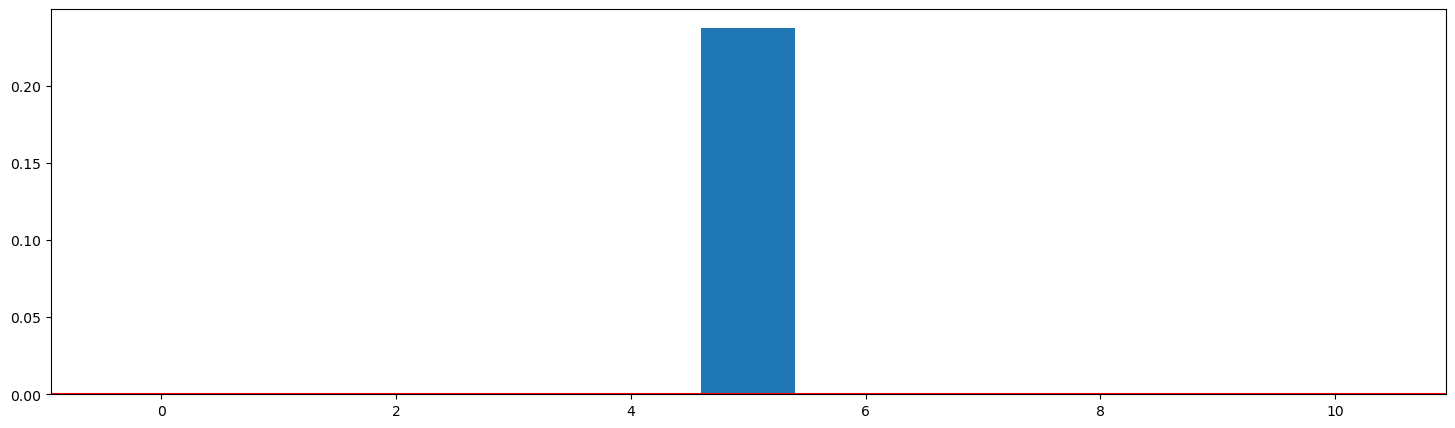

In [81]:
coefficients = lasso.coef_
intercept = lasso.intercept_

print(coefficients)
plt.figure(figsize = (18,5))
categories = ["Phone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price",
            "Recession","Chip Costs","Taylor Swift Tickets","Is the Earth Flat","Hospital"]
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color = 'red')
plt.show()

There is one coefficient stands out and make more sense. So we need to choose the appropriate value for lamda so that we can get the meaningful outcome